In [10]:
import pandas as pd
from os.path import join
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl

mpl.style.use('grayscale')
plt.rcParams["figure.figsize"] = [8, 6]

In [3]:
WINDOW_SIZE = 5 
Lmin = 2
Lmax = 22
PUP_SIZE_SCALE = 0.004
results = join('..', 'results', 'results_paper')
full = pd.read_csv(join(results, 'mean_FOx.csv'))

# Intro

In [ ]:
full.head()

In [ ]:
# f, ax = plt.subplots(1, 1)
# ax.plot(full.FOX_aggregated.tolist(), color = 'black', lw = 1)
# plt.xlabel('Consecutive 5-s epochs of ALL trials')
# plt.ylabel('Percent of time fixing on options [Range 0-1]')
# plt.title('Momentary fixation on options in all trials percentage')
# ax.set_xlim([0, 24])
# ax.set_ylim([0.1, 0.35])
# ax.set_xticks([0, 4, 8, 12, 16, 20, 24])
# ax.set_xticklabels( ['0s', '20s', '40s', '60s', '80s', '100s' , '120s'], size= 12)
# plt.show()
# plt.savefig('trzonowiec.png')

In [ ]:
### DATA LOADING
corr_lev_easy = pd.read_csv(join(results, 'dynamics_LEV_EASY_CORR.csv'))
corr_lev_med = pd.read_csv(join(results, 'dynamics_LEV_MED_CORR.csv'))
corr_lev_hard = pd.read_csv(join(results, 'dynamics_LEV_HARD_CORR.csv'))

err_lev_easy = pd.read_csv(join(results, 'dynamics_LEV_EASY_ERR.csv'))
err_lev_med = pd.read_csv(join(results, 'dynamics_LEV_MED_ERR.csv'))
err_lev_hard = pd.read_csv(join(results, 'dynamics_LEV_HARD_ERR.csv'))


# Correct trials aggregated over item types
T1 = pd.read_csv(join(results, 'dynamics_window_40_50_CORR.csv'))
T2 = pd.read_csv(join(results, 'dynamics_window_50_60_CORR.csv'))
T3 = pd.read_csv(join(results, 'dynamics_window_60_70_CORR.csv'))
T4 = pd.read_csv(join(results, 'dynamics_window_70_80_CORR.csv'))
T5 = pd.read_csv(join(results, 'dynamics_window_80_90_CORR.csv'))
T6 = pd.read_csv(join(results, 'dynamics_window_90_100_CORR.csv'))
T7 = pd.read_csv(join(results, 'dynamics_window_100_110_CORR.csv'))

corr_lev_easy['AVG_RMx'] *= 100
corr_lev_med['AVG_RMx'] *= 100
corr_lev_hard['AVG_RMx'] *= 100
err_lev_easy['AVG_RMx'] *= 100
err_lev_med['AVG_RMx'] *= 100
err_lev_hard['AVG_RMx'] *= 100

T1['AVG_RMx'] *= 100
T2['AVG_RMx'] *= 100
T3['AVG_RMx'] *= 100
T4['AVG_RMx'] *= 100
T5['AVG_RMx'] *= 100
T6['AVG_RMx'] *= 100
T7['AVG_RMx'] *= 100

corr_lev_easy['RMx_STD'] *= 100
corr_lev_med['RMx_STD'] *= 100
corr_lev_hard['RMx_STD'] *= 100

err_lev_easy['RMx_STD'] *= 100
err_lev_med['RMx_STD'] *= 100
err_lev_hard['RMx_STD'] *= 100

corr_lev_easy['PROP_PSOx'] /= WINDOW_SIZE
corr_lev_med['PROP_PSOx'] /= WINDOW_SIZE
corr_lev_hard['PROP_PSOx'] /= WINDOW_SIZE

err_lev_easy['PROP_PSOx'] /= WINDOW_SIZE
err_lev_med['PROP_PSOx'] /= WINDOW_SIZE
err_lev_hard['PROP_PSOx'] /= WINDOW_SIZE

corr_lev_easy['PSOx_STD'] /= WINDOW_SIZE
corr_lev_med['PSOx_STD'] /= WINDOW_SIZE
corr_lev_hard['PSOx_STD'] /= WINDOW_SIZE

err_lev_easy['PSOx_STD'] /= WINDOW_SIZE
err_lev_med['PSOx_STD'] /= WINDOW_SIZE
err_lev_hard['PSOx_STD'] /= WINDOW_SIZE

corr_lev_easy['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_lev_med['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_lev_hard['PROP_PSOx'] *= PUP_SIZE_SCALE

err_lev_easy['PROP_PSOx'] *= PUP_SIZE_SCALE
err_lev_med['PROP_PSOx'] *= PUP_SIZE_SCALE
err_lev_hard['PROP_PSOx'] *= PUP_SIZE_SCALE

corr_lev_easy['PSOx_STD'] *= PUP_SIZE_SCALE
corr_lev_med['PSOx_STD'] *= PUP_SIZE_SCALE
corr_lev_hard['PSOx_STD'] *= PUP_SIZE_SCALE

err_lev_easy['PSOx_STD'] *= PUP_SIZE_SCALE
err_lev_med['PSOx_STD'] *= PUP_SIZE_SCALE
err_lev_hard['PSOx_STD'] *= PUP_SIZE_SCALE

# corr_lev_easy = corr_lev_easy[2:]
# corr_lev_med = corr_lev_med[2:]
# corr_lev_hard = corr_lev_hard[2:]

# err_lev_easy = err_lev_easy[2:]
# err_lev_med = err_lev_med[2:]
# err_lev_hard = err_lev_hard[2:]


# T1 = T1[2:]
# T2 = T2[2:]
# T3 = T3[2:]
# T4 = T4[2:]
# T5 = T5[2:]
# T6 = T6[2:]
# T7 = T7[2:]

In [ ]:
#CORRECTIONS LOADING
CI_corr_lev_easy = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_EASY.csv'))
CI_corr_lev_med = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_MED.csv'))
CI_corr_lev_hard = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_HARD.csv'))

CI_err_lev_easy = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_EASY.csv'))
CI_err_lev_med = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_MED.csv'))
CI_err_lev_hard = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_HARD.csv'))

CI_corr_lev_easy['RMx_STD'] *= 100
CI_corr_lev_med['RMx_STD'] *= 100
CI_corr_lev_hard['RMx_STD'] *= 100

CI_err_lev_easy['RMx_STD'] *= 100
CI_err_lev_med['RMx_STD'] *= 100
CI_err_lev_hard['RMx_STD'] *= 100

In [ ]:
def add_CI(data, param, corr = None):
    N = {'PROP_FOx': 'Kx', 'AVG_RMx': 'RMk', 'PROP_PSOx': 'Kx'}[param]
    STD = {'PROP_FOx': 'FOx_STD', 'AVG_RMx': 'RMx_STD', 'PROP_PSOx':'PSOx_STD'}[param]
    if not (corr is None):
        data[param + '_low_CI'] = data[param] - (1.96 * corr[STD] / np.sqrt(corr[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * corr[STD] / np.sqrt(corr[N]))
    else:
        data[param + '_low_CI'] = data[param] - (1.96 * data[STD] / np.sqrt(data[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * data[STD] / np.sqrt(data[N]))

In [ ]:
add_CI(corr_lev_easy, 'AVG_RMx', corr = CI_corr_lev_easy)
add_CI(err_lev_easy,'AVG_RMx', corr = CI_err_lev_easy)
add_CI(corr_lev_med, 'AVG_RMx', corr = CI_corr_lev_med)
add_CI(err_lev_med,'AVG_RMx', corr = CI_err_lev_med)
add_CI(corr_lev_hard, 'AVG_RMx', corr = CI_corr_lev_hard)
add_CI(err_lev_hard,'AVG_RMx', corr = CI_err_lev_hard)

In [ ]:

# Define a function for the line plot with intervals
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)


# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax1.plot([(x * WINDOW_SIZE) for x in corr_lev_easy['AVG_RMx'].index.tolist()],
        corr_lev_easy['AVG_RMx'].tolist(),
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Correct trials')
# Shade the confidence interval
ax1.fill_between([(x * WINDOW_SIZE) for x in corr_lev_easy['AVG_RMx'].index.tolist()],
                corr_lev_easy['AVG_RMx_low_CI'],
                corr_lev_easy['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)

ax1.plot([(x * WINDOW_SIZE) for x in err_lev_easy['AVG_RMx'].index.tolist()],
        err_lev_easy['AVG_RMx'].tolist(),'--', 
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Incorrect trials')
# Shade the confidence interval
ax1.fill_between([(x * WINDOW_SIZE) for x in err_lev_easy['AVG_RMx'].index.tolist()],
                err_lev_easy['AVG_RMx_low_CI'],
                err_lev_easy['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)


# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax2.plot([(x * WINDOW_SIZE) for x in corr_lev_med['AVG_RMx'].index.tolist()],
        corr_lev_med['AVG_RMx'].tolist(),
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Correct trials')
# Shade the confidence interval
ax2.fill_between([(x * WINDOW_SIZE) for x in corr_lev_med['AVG_RMx'].index.tolist()],
                corr_lev_med['AVG_RMx_low_CI'],
                corr_lev_med['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)

ax2.plot([(x * WINDOW_SIZE) for x in err_lev_med['AVG_RMx'].index.tolist()],
        err_lev_med['AVG_RMx'].tolist(),'--', 
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Incorrect trials')
# Shade the confidence interval
ax2.fill_between([(x * WINDOW_SIZE) for x in err_lev_med['AVG_RMx'].index.tolist()],
                err_lev_med['AVG_RMx_low_CI'],
                err_lev_med['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)


# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax3.plot([(x * WINDOW_SIZE) for x in corr_lev_hard['AVG_RMx'].index.tolist()],
        corr_lev_hard['AVG_RMx'].tolist(),
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Correct trials')
# Shade the confidence interval
ax3.fill_between([(x * WINDOW_SIZE) for x in corr_lev_hard['AVG_RMx'].index.tolist()],
                corr_lev_hard['AVG_RMx_low_CI'],
                corr_lev_hard['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)

ax3.plot([(x * WINDOW_SIZE) for x in err_lev_hard['AVG_RMx'].index.tolist()],
        err_lev_hard['AVG_RMx'].tolist(), '--', 
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Incorrect trials')
# Shade the confidence interval
ax3.fill_between([(x * WINDOW_SIZE) for x in err_lev_hard['AVG_RMx'].index.tolist()],
                err_lev_hard['AVG_RMx_low_CI'],
                err_lev_hard['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)

ax4.plot([(x * WINDOW_SIZE) for x in T1['AVG_RMx'].index.tolist()], T1['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE) for x in T2['AVG_RMx'].index.tolist()], T2['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE) for x in T3['AVG_RMx'].index.tolist()], T3['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE) for x in T4['AVG_RMx'].index.tolist()], T4['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE) for x in T5['AVG_RMx'].index.tolist()], T5['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE) for x in T6['AVG_RMx'].index.tolist()], T6['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE) for x in T7['AVG_RMx'].index.tolist()], T7['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')



# Label the axes and provide a title
ax1.set_title('Relationally dissimilar options (PERC) items', {'size': 15})
ax1.set_xlabel('Consecutive 5-s epochs of PERC trials', {'size': 16})
ax1.set_xlim([WINDOW_SIZE * Lmin,WINDOW_SIZE * (Lmax-1)])

ax2.set_title('Relationally mixed options (MIX) items', {'size': 15})
ax2.set_xlabel('Consecutive 5-s epochs of MIX trials', {'size': 16})
ax2.set_xlim([WINDOW_SIZE * Lmin,WINDOW_SIZE * (Lmax-1)])

ax3.set_title('Relationally similar options (REL) items', {'size': 15})
ax3.set_xlabel('Consecutive 5-s epochs of REL trials', {'size': 16})

ax1.set_ylabel('Momentary relational similarity of response options fixated (in %)', {'size': 16})
ax4.set_title('Correct trials aggregated over item types', {'size': 15})
ax4.set_xlabel('Consecutive 5-s epochs of correct trials', {'size': 16})
ax4.set_xlim([WINDOW_SIZE * Lmin,WINDOW_SIZE * (Lmax-1)])

ax1.set_xlim([0,115])
ax2.set_xlim([0,115])
ax3.set_xlim([0,115])
ax4.set_xlim([0,115])

#     ax.set_ylim([0,1])

# ax1.set_xticklabels( ['10s', '30s', '50s', '70s', '90s', '110s'], size= 12)
# ax2.set_xticklabels( ['10s', '30s', '50s', '70s', '90s', '110s'], size=12)
# ax3.set_xticklabels( ['10s', '30s', '50s', '70s', '90s', '110s'], size=12)
# ax4.set_xticklabels( ['10s', '30s', '50s', '70s', '90s', '110s'], size=12)
# Display legend
ax3.legend(loc = 'lower right',fontsize= 12)
ax4.set_ylim([20, 90])
ax1.tick_params(labelsize=12)
f.suptitle('Dynamics of analogical mapping in the time course of Figural Analogy trials', size=20)
# ax1.legend(loc = 'best')
# f.savefig('rys1mm.png')

# FIX TYPE DYNAMICS

In [51]:
ans_type_res = pickle.load(open('../results/LEV_HARD_CORR_ans_type_res.pickle', 'rb'))
ans_df = pd.DataFrame()

In [52]:
ans_type_res.keys()

dict_keys(['CORR', 'BE', 'SE', 'CON'])

In [53]:
ans_df['CORR'] = [sum(x) for x in ans_type_res['CORR']]
ans_df['SE'] = [sum(x) for x in ans_type_res['SE']] 
ans_df['BE'] = [sum(x) for x in ans_type_res['BE']] 
ans_df['CON'] = [sum(x) for x in ans_type_res['CON']]

ans_df['BE'] /= 2.0
ans_df['SE'] /= 2.0
ans_df_perc = ans_df.divide(ans_df.sum(axis=1), axis=0) * 100.0
ans_df_perc.to_csv('LEV_HARD_CORR_ans_type_res.csv')

<IPython.core.display.Javascript object>


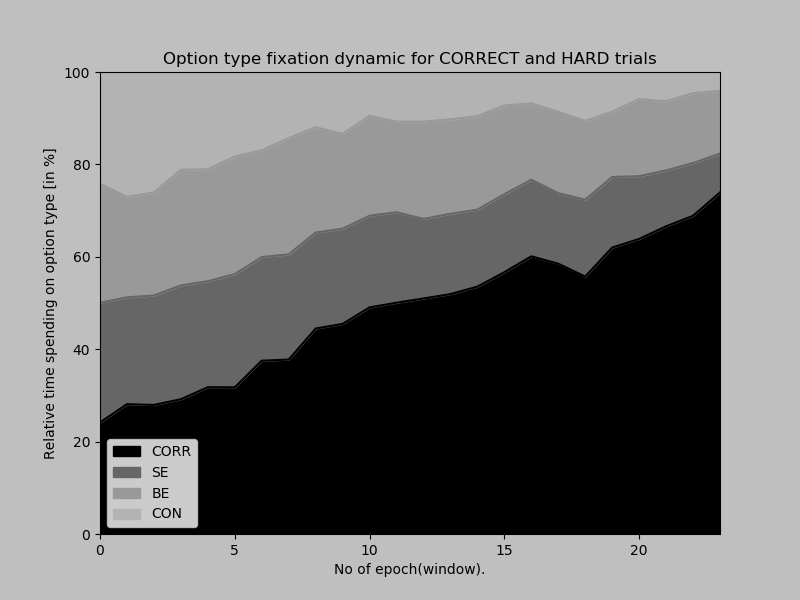

In [44]:
ans_df_perc.plot.area()
plt.margins(0.0)
plt.xlabel('No of epoch(window).')
plt.ylabel('Relative time spending on option type [in %]')
plt.title("Option type fixation dynamic for CORRECT and HARD trials")
plt.legend(loc='lower left')
plt.ylim([0, 100.0])
plt.savefig('Lev_hard_Corr_ans_type.png')

In [ ]:
plt.show()
